In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

# Effects of Learning Rate on Model Accuracy

## Salary Dataset

In [2]:
df = pd.read_csv('datasets/Salary_dataset.csv', index_col = 0)
x = df.iloc[:, 0].to_numpy()
y = df.iloc[:, 1].to_numpy()
var_names = list(df.columns)
feature = var_names[0]
target = var_names[1]
m = len(x)

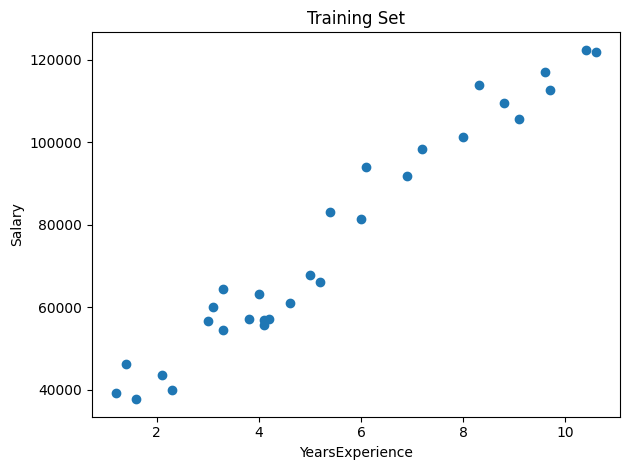

In [3]:
plt.scatter(x, y)
plt.title('Training Set')
plt.xlabel(feature)
plt.ylabel(target)
plt.tight_layout()
plt.savefig('figures/10_training_set.png')
plt.show()

## Learning Rate on Model Accuracy

In [4]:
# Functions
def compute_cost(x, y, w, b):
    m = len(y)
    total_cost = 0
    for xi, yi in zip(x, y):
        total_cost += (yi - (w * xi + b)) ** 2
    return total_cost / (2 * m)

def compute_gradients(x, y, w, b):
    m = len(y)
    dj_dw = 0
    dj_db = 0
    for xi, yi in zip(x, y):
        error = (yi - (w * xi + b))
        dj_dw += -xi * error
        dj_db += -error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, num_iterations, cost_func, grad_func):
    cost_history = []
    params_history = [(w, b)]

    for i in range(num_iterations):
        # Compute gradients
        dj_dw, dj_db = grad_func(x, y, w, b)

        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Compute cost
        cost = cost_func(x, y, w, b)

        # Record history
        cost_history.append(cost)
        params_history.append((w, b))

    return w, b, cost_history, params_history

In [5]:
def plot_learning_curve_and_trajectory(alpha, iterations, cost_func, gradient_func, gradient_descent, x, y, w, b):
    # Run gradient descent to get the final parameters, cost history, and parameter history
    final_w, final_b, cost_history, params_history = gradient_descent(x, y, w, b, alpha, iterations, cost_func, gradient_func)
    
    # Extract parameter history (assuming params_history contains (w, b) tuples)
    w_history = np.array([w for w, b in params_history])
    
    # Create the figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Subplot 1: Learning Curve
    ax1.plot(range(1, iterations + 1), cost_history, label='Cost')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Cost')
    ax1.set_title('Learning Curve')
    ax1.legend()
    ax1.grid(True)

    # Subplot 2: Trajectory and Cost Function
    # Generate w values for the cost function plot
    w_min, w_max = np.min(w_history), np.max(w_history)
    w_values = np.linspace(w_min - 1, w_max + 1, 100)
    costs = [cost_func(x, y, w, final_b) for w in w_values]
    cost_history2 = [cost_func(x, y, w, final_b) for w in w_history]

    ax2.plot(w_values, costs, label='Cost Function', color='blue')
    ax2.plot(w_history, cost_history2, color='red', marker = 'x', linestyle='-', label='Trajectory')
    ax2.set_xlabel('Slope Parameter w')
    ax2.set_ylabel('Cost')
    ax2.set_title('Trajectory of Cost and Cost Function at alpha = {}'.format(alpha))
    ax2.legend()
    ax2.grid(True)
    plt.tight_layout()
    plt.savefig('figures/11_learning_rate_{}.png'.format(alpha))
    plt.show()

In [6]:
# Parameter Settings
w_in = 5000.0
b_in = 0.0

iterations = 10

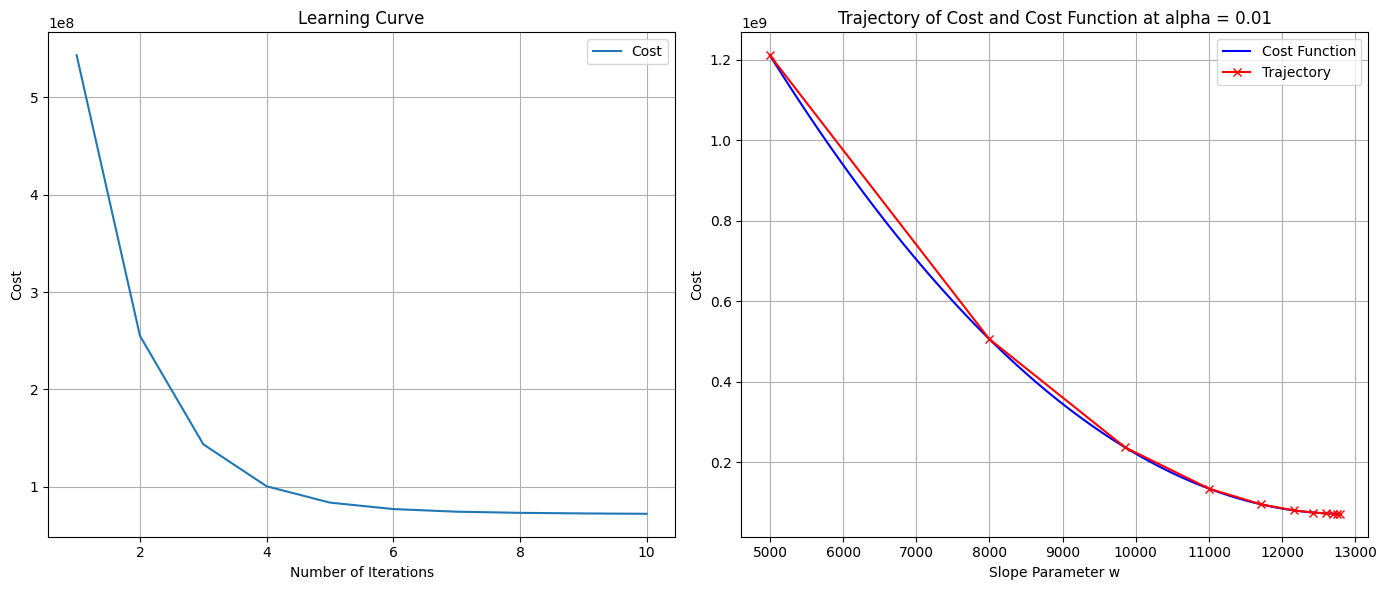

In [7]:
alpha = 1.0e-2
plot_learning_curve_and_trajectory(alpha, iterations, compute_cost, compute_gradients, gradient_descent, x, y, w_in, b_in)

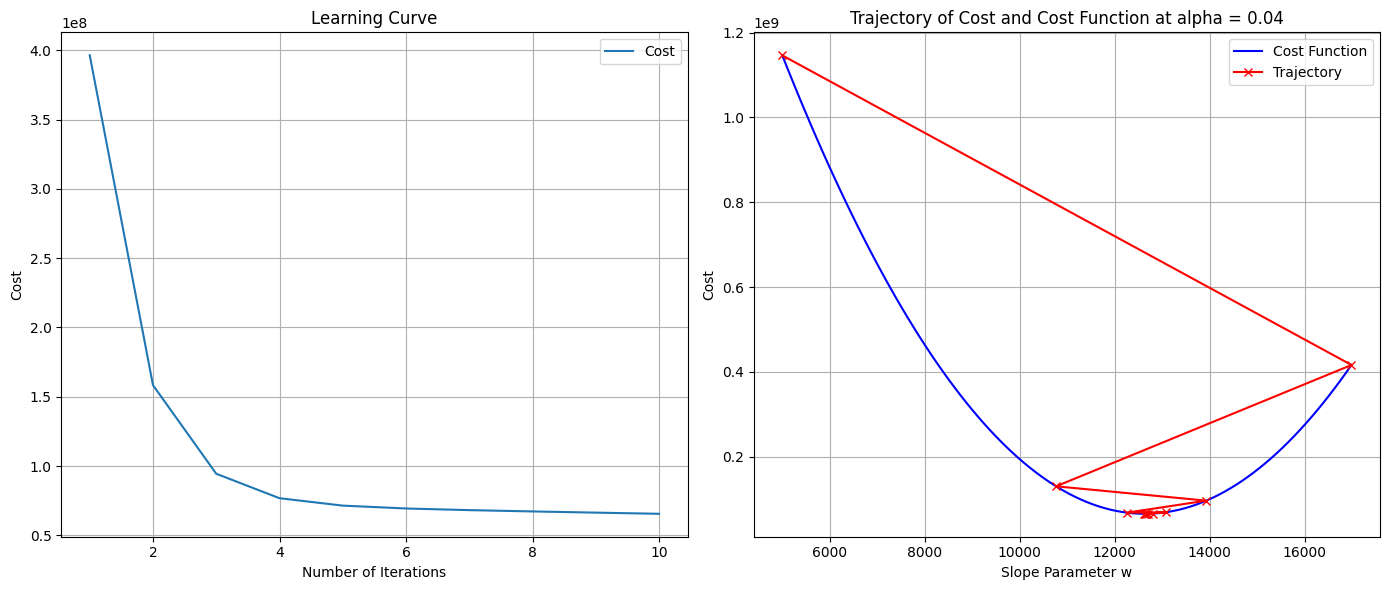

In [8]:
alpha = 4.0e-2
plot_learning_curve_and_trajectory(alpha, iterations, compute_cost, compute_gradients, gradient_descent, x, y, w_in, b_in)

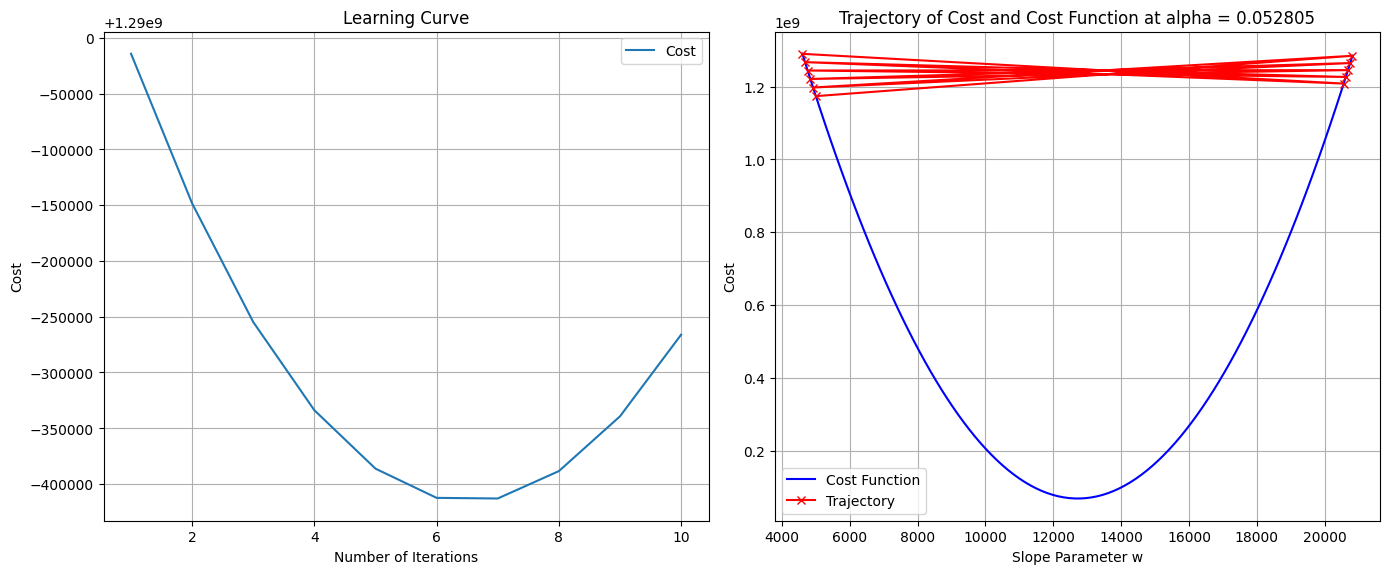

In [9]:
alpha = 5.2805e-2
plot_learning_curve_and_trajectory(alpha, iterations, compute_cost, compute_gradients, gradient_descent, x, y, w_in, b_in)

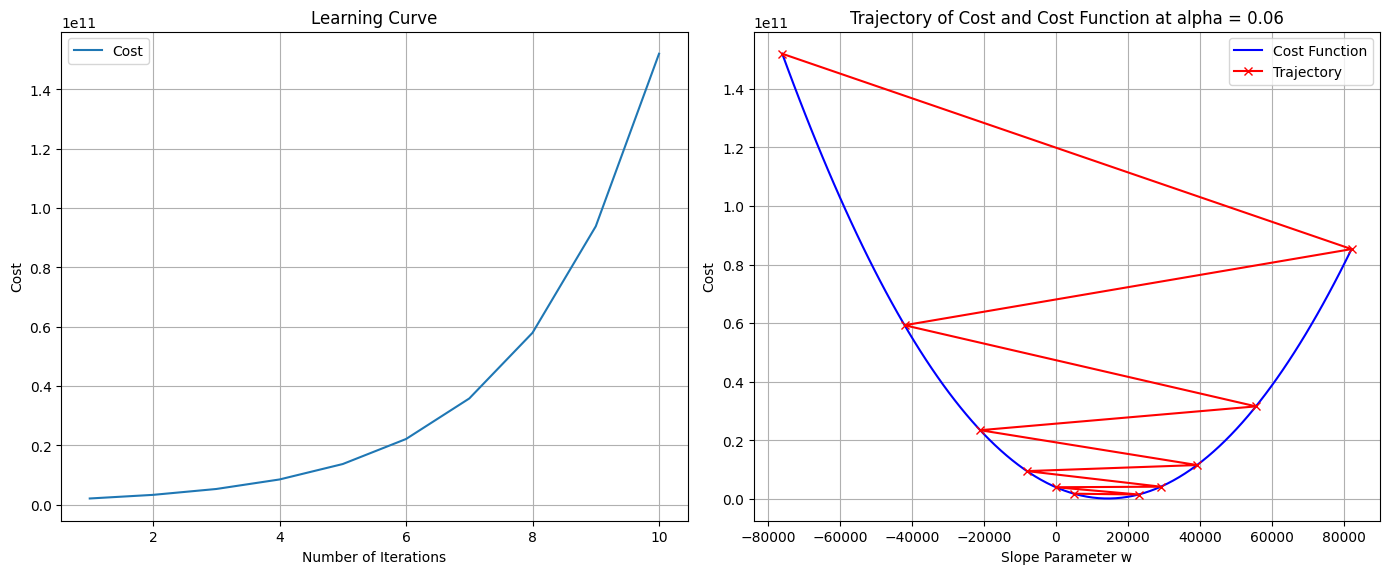

In [10]:
alpha = 6.0e-2
plot_learning_curve_and_trajectory(alpha, iterations, compute_cost, compute_gradients, gradient_descent, x, y, w_in, b_in)

## Learning Rate on Model Speed

In [11]:
# Gradient Descent Function with Convergence Condition
def gradient_descent_converge(x, y, w, b, alpha, num_iterations, epsilon, cost_func, grad_func):
    cost_history = []
    converged_step = 0

    for i in range(num_iterations):
        dj_dw, dj_db = grad_func(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        cost = cost_func(x, y, w, b)
        cost_history.append(cost)

        # Check for convergence
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < epsilon:
            converged_step = i
            break

    return w, b, converged_step

In [12]:
# Parameter Settings
w_in = 0.0
b_in = 0.0
epsilon = 0.1 ** 3
iterations = 10 ** 8

In [13]:
# Comparing convergence time by alpha
alpha_list = [0.01 / (10**i) for i in range(5)]
elapsed_times = []
converged_steps = []

for alpha in alpha_list:
    start_time = time.time()
    w_final, b_final, converged_step = gradient_descent_converge(x, y, w_in, b_in, alpha, iterations, epsilon, compute_cost, compute_gradients)
    end_time = time.time()
    elapsed_times.append(end_time - start_time)
    converged_steps.append(converged_step)

In [14]:
# Check numerical results
print(alpha_list, elapsed_times, converged_steps)

[0.01, 0.001, 0.0001, 1e-05, 1e-06] [0.08256983757019043, 0.9229738712310791, 5.913031578063965, 49.808528423309326, 405.92744541168213] [4677, 41213, 356144, 3001230, 24409958]


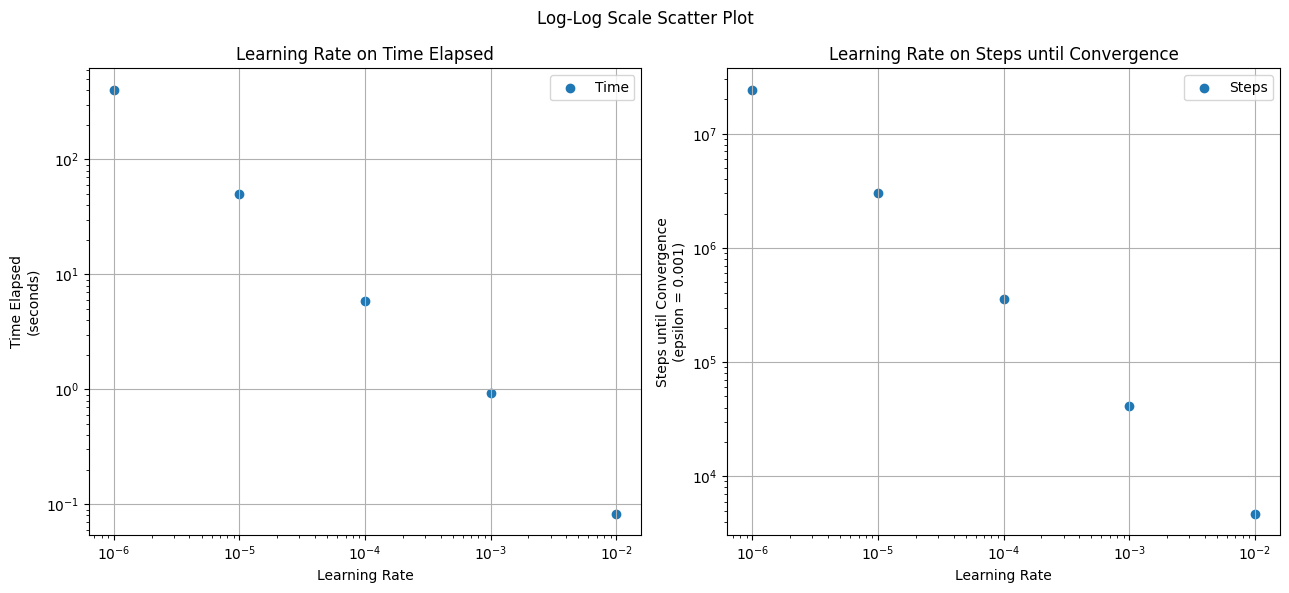

In [15]:
# Plot results on log log scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
ax1.scatter(alpha_list, elapsed_times, label = 'Time')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Time Elapsed\n(seconds)')
ax1.set_title('Learning Rate on Time Elapsed')
ax1.legend()
ax1.grid(True)

ax2.scatter(alpha_list, converged_steps, label = 'Steps')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel(f'Steps until Convergence\n(epsilon = {epsilon:.3f})')
ax2.set_title('Learning Rate on Steps until Convergence')
ax2.legend()
ax2.grid(True)

fig.suptitle('Log-Log Scale Scatter Plot')
fig.tight_layout()
fig.savefig('figures/12_log_scatter.png')
plt.show()

In [16]:
# Regress learning rate
log_x = np.log10(alpha_list)
log_y1 = np.log10(elapsed_times)
log_y2 = np.log10(converged_steps)

slope1, intercept1, r_value, p_value, std_err = linregress(log_x, log_y1)
slope2, intercept2, r_value, p_value, std_err = linregress(log_x, log_y2)

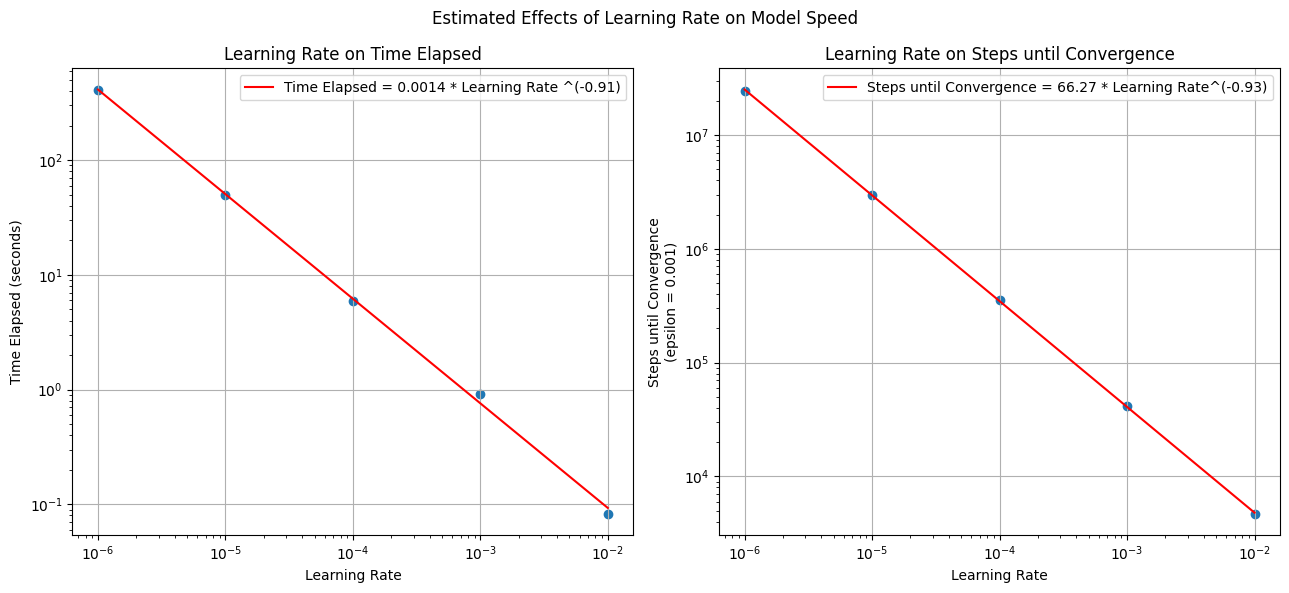

In [25]:
# Plot Fitted Line on log log scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (13, 6))
ax1.scatter(alpha_list, elapsed_times)
ax1.plot(alpha_list, 10**(intercept1 + slope1 * np.log10(alpha_list)), color='red', label=f'Time Elapsed = {10**intercept1:.4f} * Learning Rate ^({slope1:.2f})')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Time Elapsed (seconds)')
ax1.set_title('Learning Rate on Time Elapsed')
ax1.legend()
ax1.grid(True)

ax2.scatter(alpha_list, converged_steps)
ax2.plot(alpha_list, 10**(intercept2 + slope2 * np.log10(alpha_list)), color='red', label=f'Steps until Convergence = {10**intercept2:.2f} * Learning Rate^({slope2:.2f})')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel(f'Steps until Convergence\n(epsilon = {epsilon:.3f})')
ax2.set_title('Learning Rate on Steps until Convergence')
ax2.legend()
ax2.grid(True)

fig.suptitle('Estimated Effects of Learning Rate on Model Speed')
fig.tight_layout()
fig.savefig('figures/13_fitted_original.png')
plt.show()

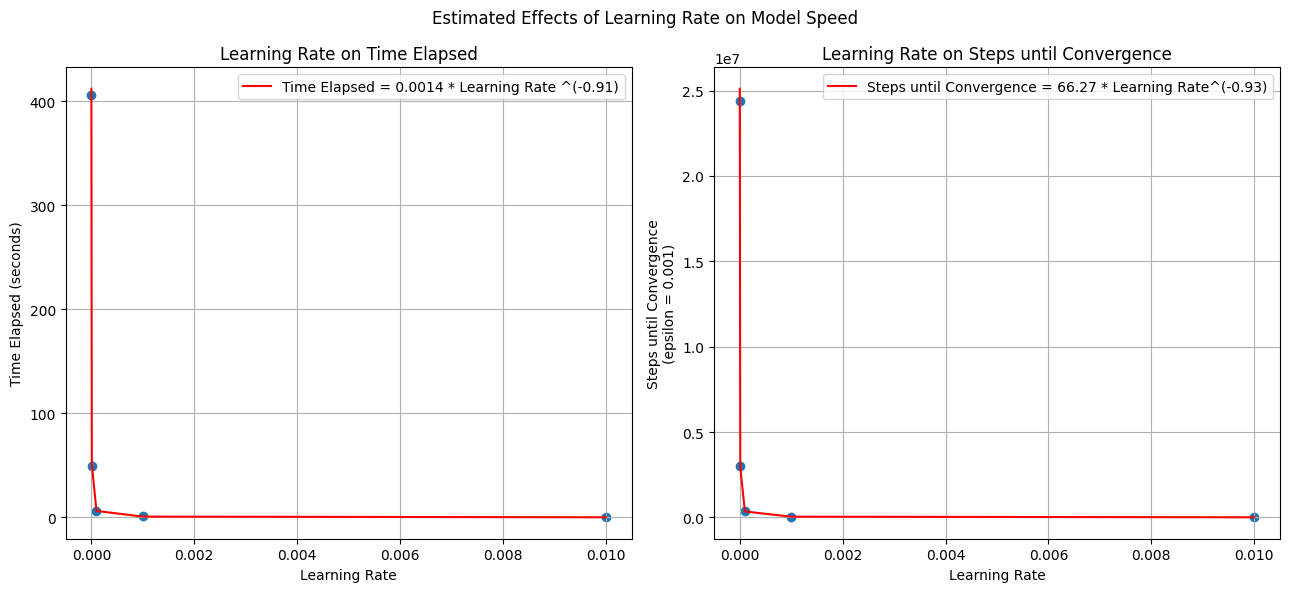

In [26]:
# Plot Fitted Line on original scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (13, 6))
ax1.scatter(alpha_list, elapsed_times)
ax1.plot(alpha_list, 10**(intercept1 + slope1 * np.log10(alpha_list)), color='red', label=f'Time Elapsed = {10**intercept1:.4f} * Learning Rate ^({slope1:.2f})')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Time Elapsed (seconds)')
ax1.set_title('Learning Rate on Time Elapsed')
ax1.legend()
ax1.grid(True)

ax2.scatter(alpha_list, converged_steps)
ax2.plot(alpha_list, 10**(intercept2 + slope2 * np.log10(alpha_list)), color='red', label=f'Steps until Convergence = {10**intercept2:.2f} * Learning Rate^({slope2:.2f})')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel(f'Steps until Convergence\n(epsilon = {epsilon:.3f})')
ax2.set_title('Learning Rate on Steps until Convergence')
ax2.legend()
ax2.grid(True)

fig.suptitle('Estimated Effects of Learning Rate on Model Speed')
fig.tight_layout()
fig.savefig('figures/14_fitted_log.png')
plt.show()